In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

In [1]:
np.pi

3.141592653589793

In [2]:
import zipfile

In [3]:
zipfile.ZipFile

zipfile.ZipFile

In [4]:
from numpy import array

In [5]:
array

<function numpy.core.multiarray.array>

In [6]:
zipped = zipfile.ZipFile('data/taxirides.csv.zip')

In [7]:
pwd

'/home/wendell/code/learnpython'

In [8]:
file_list = zipped.namelist()
print(file_list)

['firstday.csv']


In [19]:
file_in_archive = file_list[0]

with zipped.open(file_in_archive, 'r') as f:
    line = f.readline()
    print(line)
    line2 = f.readline()
    print(line2)

b'passenger_count,trip_time_in_secs,trip_distance,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude\n'
b'4,382,1.0,-73.978165,40.757977000000004,-73.989838,40.751171\n'


In [22]:
with zipped.open(file_in_archive, 'r') as f:
    data = np.genfromtxt(f, skip_header=1, delimiter=',')

In [23]:
data.shape

(412630, 7)

In [24]:
print(data[:10, :])

[[  4.00000000e+00   3.82000000e+02   1.00000000e+00  -7.39781650e+01
    4.07579770e+01  -7.39898380e+01   4.07511710e+01]
 [  1.00000000e+00   1.31000000e+02   5.00000000e-01  -7.39921720e+01
    4.07499540e+01  -7.39967500e+01   4.07445530e+01]
 [  2.00000000e+00   1.53700000e+03   1.02000000e+01  -7.38627090e+01
    4.07691420e+01  -7.39820790e+01   4.07622950e+01]
 [  1.00000000e+00   2.25000000e+02   1.20000000e+00  -7.39823840e+01
    4.07521020e+01  -7.39933320e+01   4.07363930e+01]
 [  3.00000000e+00   3.27000000e+02   1.40000000e+00  -7.39879300e+01
    4.07495420e+01  -7.39789810e+01   4.07667350e+01]
 [  2.00000000e+00   4.53000000e+02   2.10000000e+00  -7.39847340e+01
    4.07693100e+01  -7.39977870e+01   4.07442050e+01]
 [  2.00000000e+00   1.36100000e+03   1.89000000e+01  -7.37833180e+01
    4.06486360e+01  -7.39642490e+01   4.07195430e+01]
 [  2.00000000e+00   1.88000000e+02   8.00000000e-01  -7.39837110e+01
    4.07560920e+01  -7.39849400e+01   4.07482220e+01]
 [  1.00

In [25]:
import pandas

In [26]:
with zipped.open(file_list[0]) as f:
    data = pandas.read_csv(f)

In [28]:
data

,passenger_count,trip_time_in_secs,trip_distance,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude
0,4,382,1.00,-73.978165,40.757977,-73.989838,40.751171
1,1,131,0.50,-73.992172,40.749954,-73.996750,40.744553
2,2,1537,10.20,-73.862709,40.769142,-73.982079,40.762295
3,1,225,1.20,-73.982384,40.752102,-73.993332,40.736393
4,3,327,1.40,-73.987930,40.749542,-73.978981,40.766735
5,2,453,2.10,-73.984734,40.769310,-73.997787,40.744205
6,2,1361,18.90,-73.783318,40.648636,-73.964249,40.719543
7,2,188,0.80,-73.983711,40.756092,-73.984940,40.748222
8,1,587,2.80,-73.959908,40.806396,-73.983292,40.775673
9,2,927,1.80,-73.989059,40.750572,-73.973686,40.755997


In [30]:
data.passenger_count.min()

0

### Exercise

Calculate the median speed of all taxi rides in Miles per Hour

*Bonus:* Also calculate the mean, and beware the infinity!

In [33]:
# Bonus answer!
# There are lots of ways to do this, but here is one
speeds = (data.trip_distance / 
          (data.trip_time_in_secs / 3600))
valid_speeds = speeds[np.isfinite(speeds)]
print('Mean speed:', valid_speeds.mean())
print('Median speed:', speeds.median())

Mean speed: 18.1353235639
Median speed: 14.706927175843694


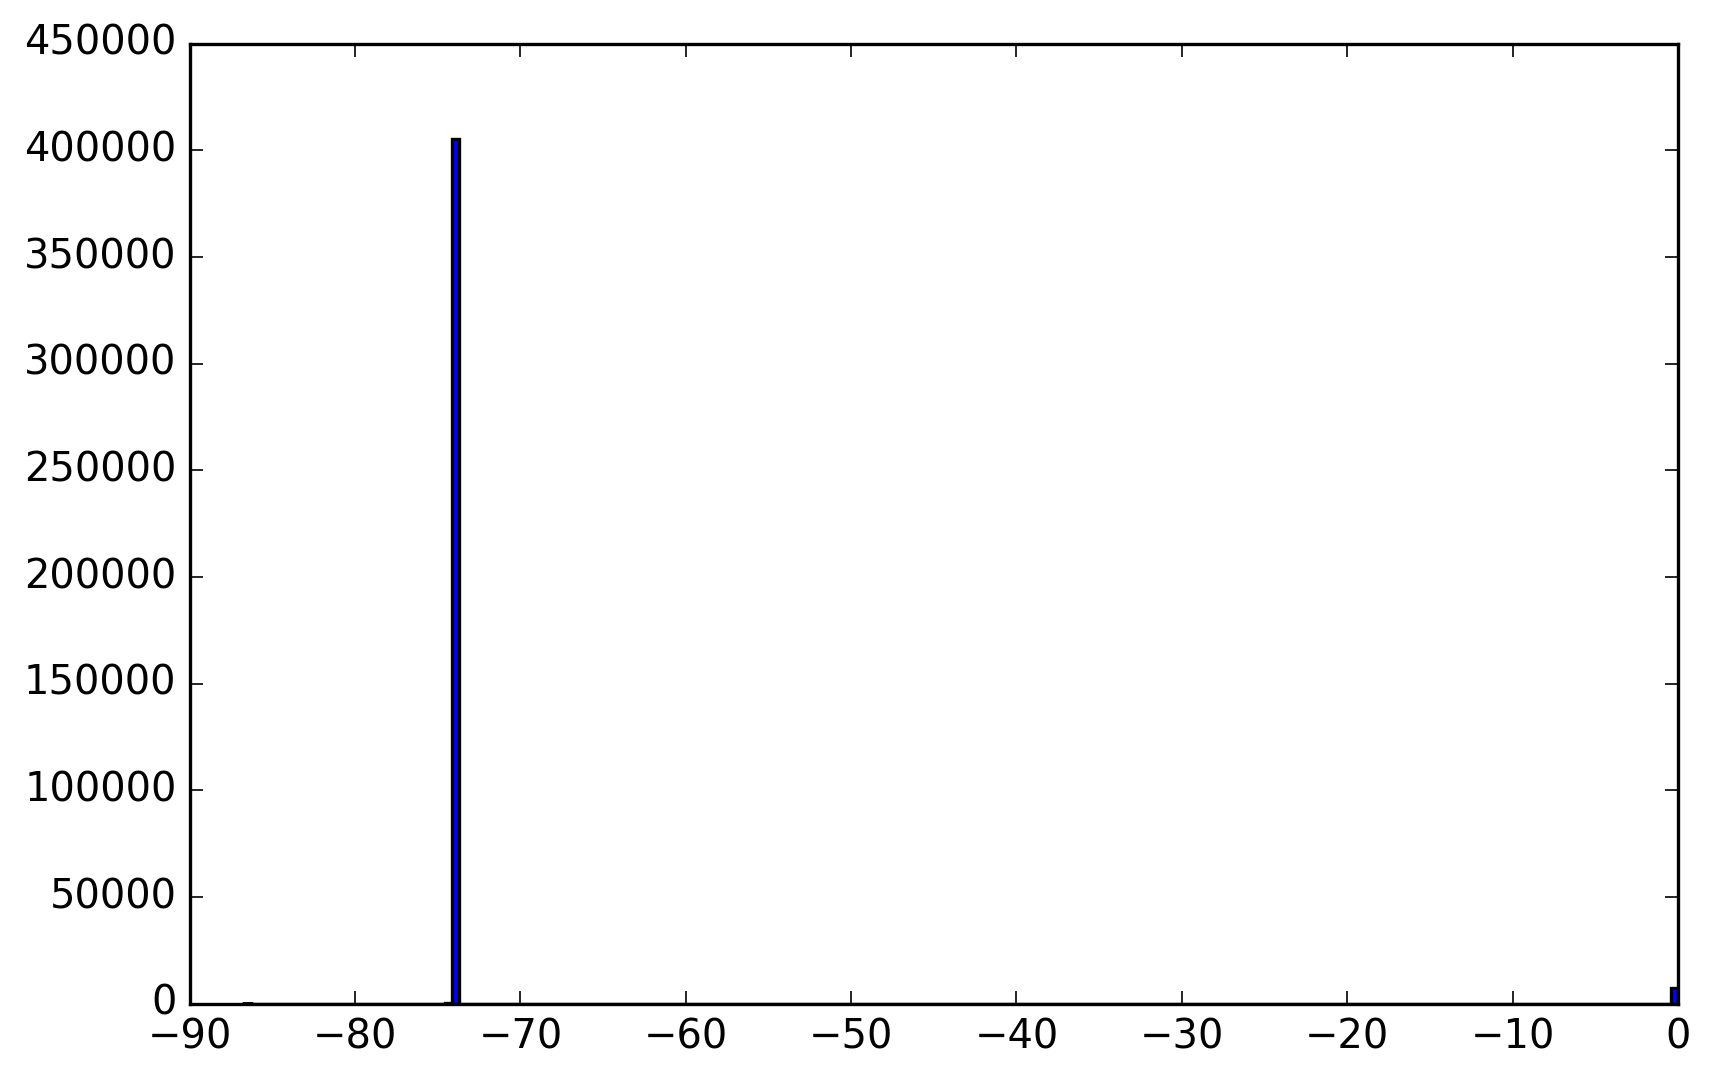

In [35]:
plt.hist(data.pickup_longitude, bins=200);

In [36]:
def calculate_median_mad(values):
    median = np.median(values)
    mad = np.median(np.abs(values - median))
    return median, mad

In [37]:
median, mad = calculate_median_mad(data.pickup_longitude)
print(median)
std = np.std(data.pickup_longitude)
print(mad, std)

-73.980919
0.012406 9.76513931034


In [38]:
from mad import median_mad

In [40]:
median, mad = median_mad(data.pickup_longitude)
print(median, mad)

-73.980919 0.012406


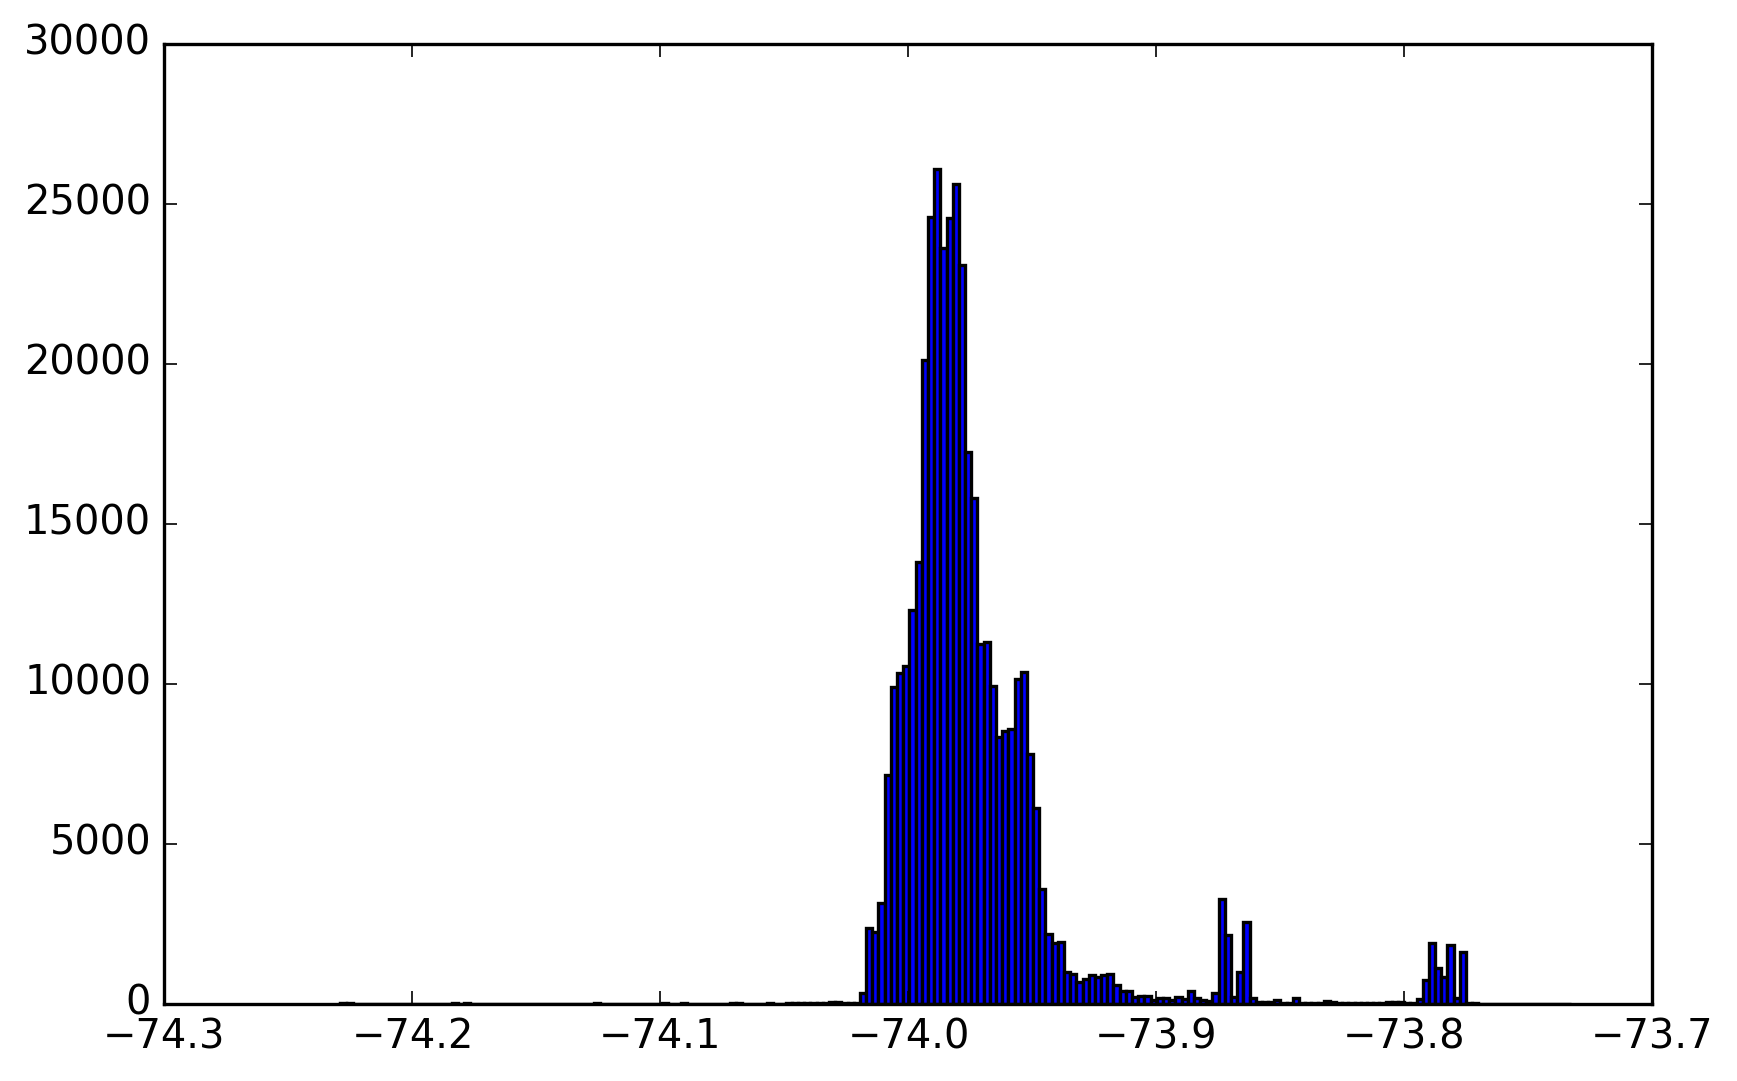

In [43]:
long_lo = median - 20*mad
long_hi = median + 20*mad

plt.hist(data.pickup_longitude, 
         bins=np.linspace(long_lo, long_hi, 200));

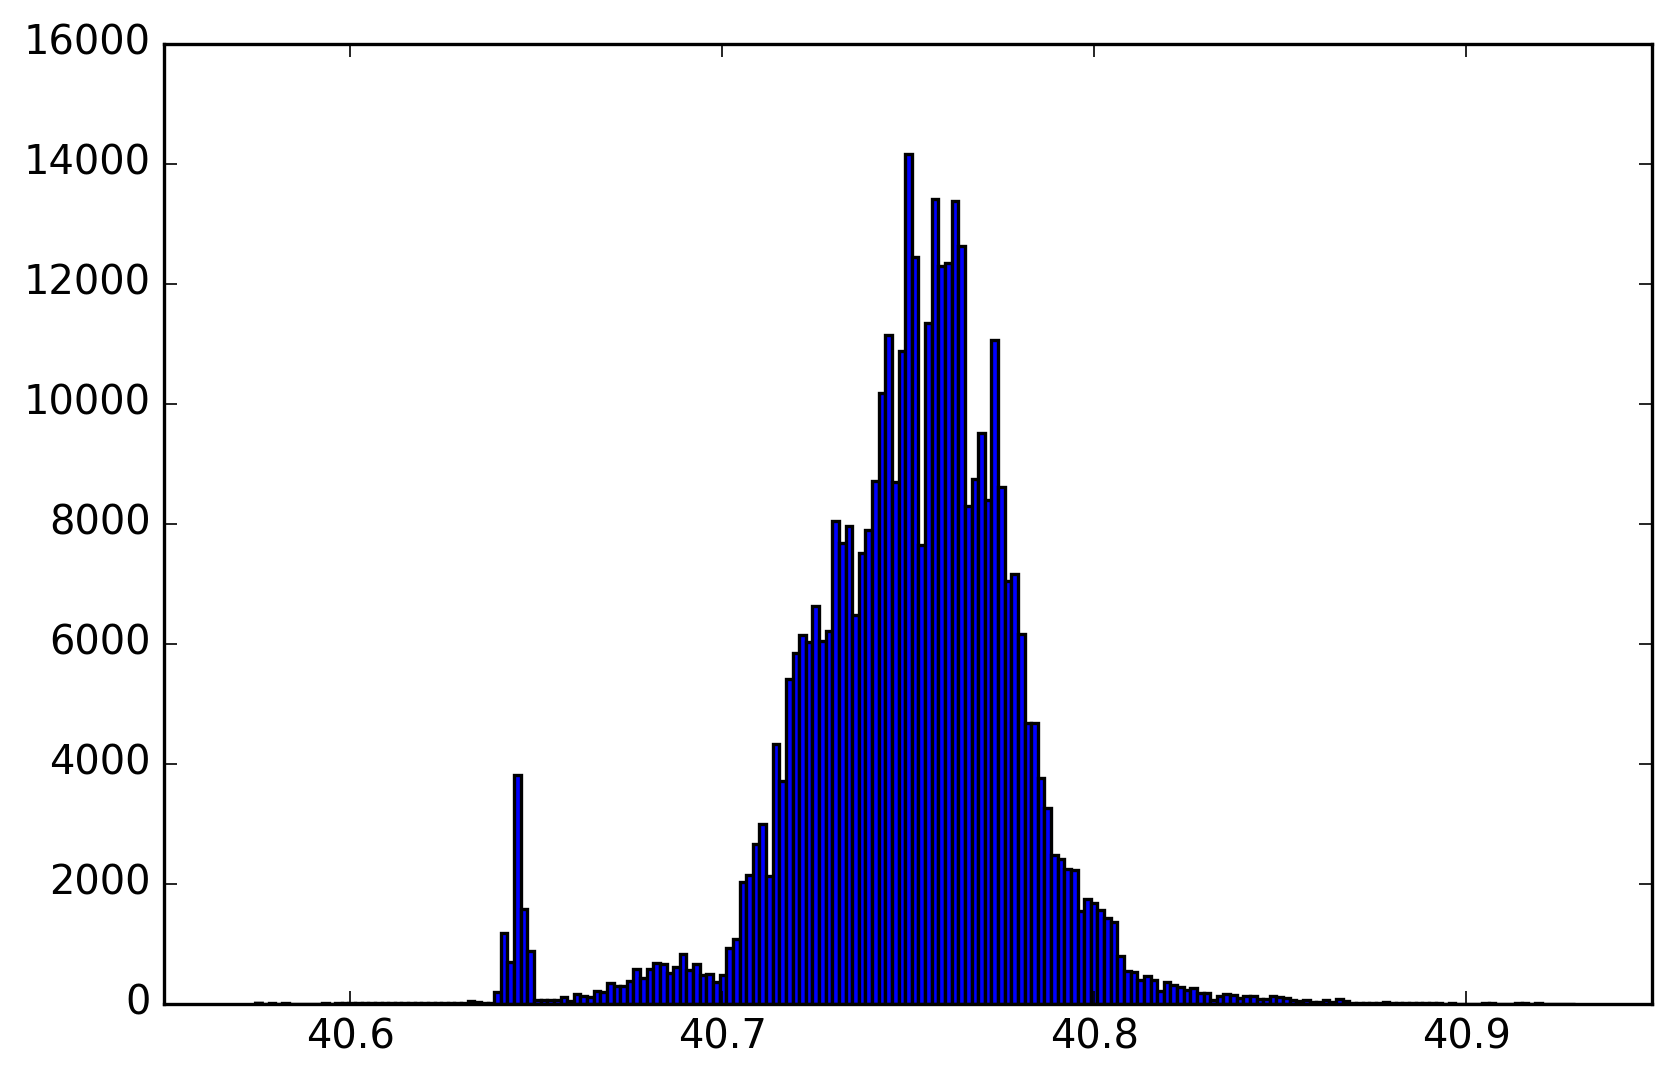

In [44]:
median, mad = median_mad(data.pickup_latitude)
lat_lo = median - 10*mad
lat_hi = median + 10*mad

plt.hist(data.pickup_latitude, 
         bins=np.linspace(lat_lo, lat_hi, 200));

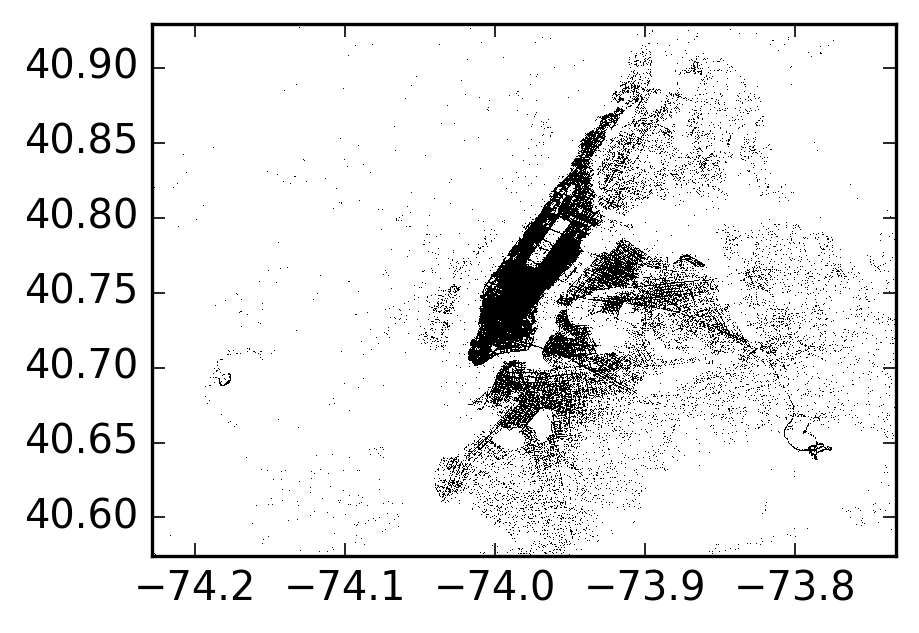

In [47]:
plt.subplots(figsize=(4,3))
plt.plot(data.dropoff_longitude, 
         data.dropoff_latitude, 'k,')
plt.axis('scaled')
plt.xlim(long_lo, long_hi)
plt.ylim(lat_lo, lat_hi);